In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

C:\Users\BIMAL DAS\AppData\Local\Temp\ipykernel_13408\4142964167.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_excel("Copy of loan.xlsx")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,Zero,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,One,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,Zero,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,Zero,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,Zero,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

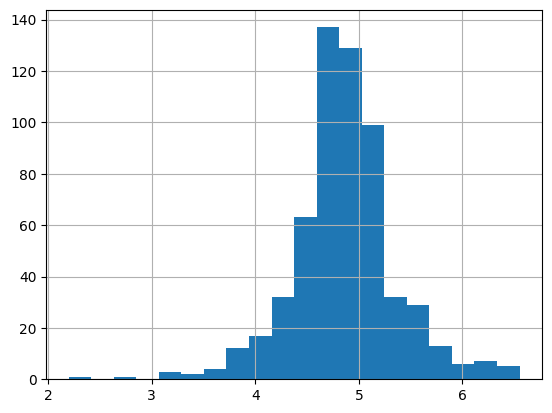

In [5]:
df["LoanAmount_log"] = np.log(df["LoanAmount"])
df["LoanAmount_log"].hist(bins = 20)

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

<Axes: >

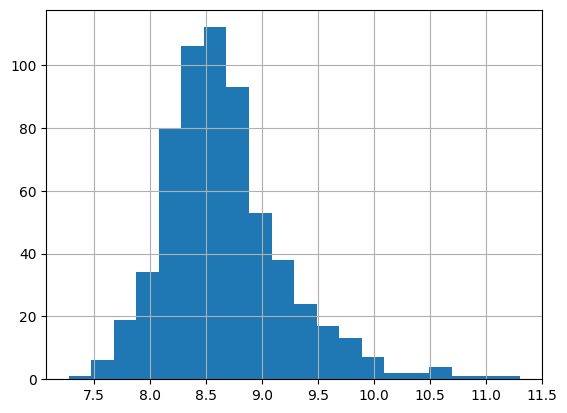

In [7]:
df["TotalIncome"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df["TotalIncome_log"] = np.log(df["TotalIncome"])
df["TotalIncome_log"].hist(bins = 20)

In [8]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace = True)
df["Married"].fillna(df["Married"].mode()[0], inplace = True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace = True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace = True)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount_log = df.LoanAmount_log.fillna(df.LoanAmount_log.mean())

df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace = True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace = True)

df.isnull().sum()

C:\Users\BIMAL DAS\AppData\Local\Temp\ipykernel_13408\3572954214.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna(df["Gender"].mode()[0], inplace = True)
C:\Users\BIMAL DAS\AppData\Local\Temp\ipykernel_13408\3572954214.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [9]:
X = df.iloc[:,np.r_[1:5,9:11,13:15]].values
y = df.iloc[:,12].values


In [10]:
print("per of missing gender is %2f%%" %((df["Gender"].isnull().sum()/df.shape[0])*100))

per of missing gender is 0.000000%


Number of people who take loan as group by gender:
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

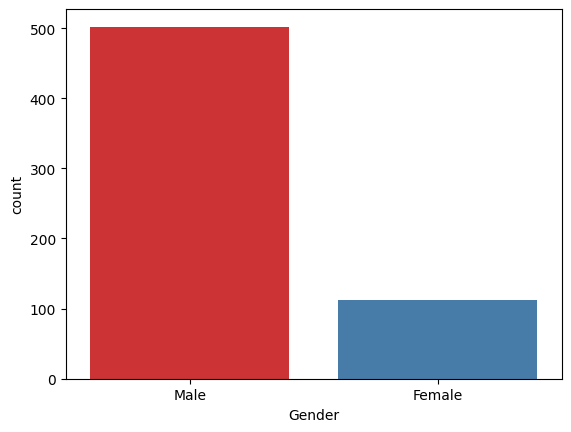

In [11]:
print("Number of people who take loan as group by gender:")
print(df["Gender"].value_counts())
sns.countplot(x = "Gender",data = df, hue = "Gender",palette = "Set1")


Number of people who take loan as group by marital status:
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

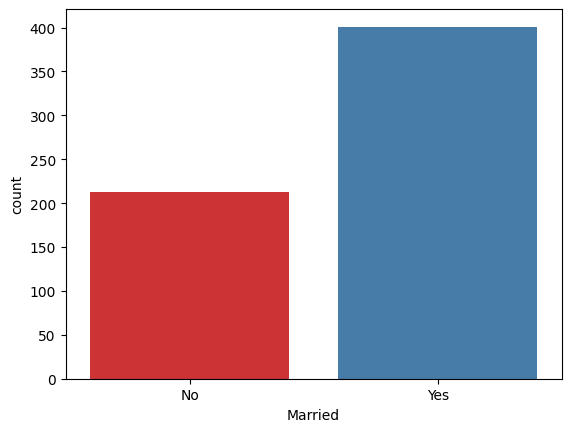

In [12]:
print("Number of people who take loan as group by marital status:")
print(df["Married"].value_counts())
sns.countplot(x = "Married",data = df, hue = "Married",palette = "Set1")


Number of people who take loan as group by dependents:
Dependents
Zero               360
One                102
Two                101
More than Three     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

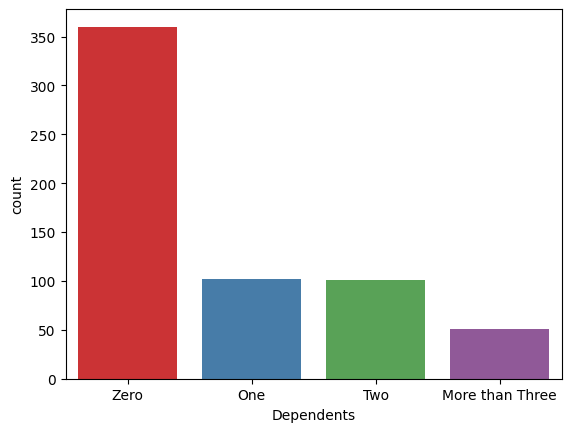

In [13]:
print("Number of people who take loan as group by dependents:")
print(df["Dependents"].value_counts())
sns.countplot(x = "Dependents",data = df, hue = "Dependents",palette = "Set1")


Number of people who take loan as group by employed:
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

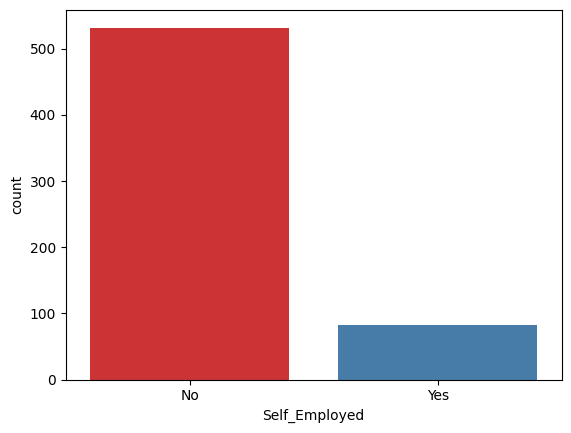

In [14]:
print("Number of people who take loan as group by employed:")
print(df["Self_Employed"].value_counts())
sns.countplot(x = "Self_Employed",data = df, hue = "Self_Employed",palette = "Set1")


Number of people who take loan as group by Loanamount:
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


C:\Users\BIMAL DAS\AppData\Local\Temp\ipykernel_13408\3772694191.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "LoanAmount",data = df,palette = "Set1")


<Axes: xlabel='LoanAmount', ylabel='count'>

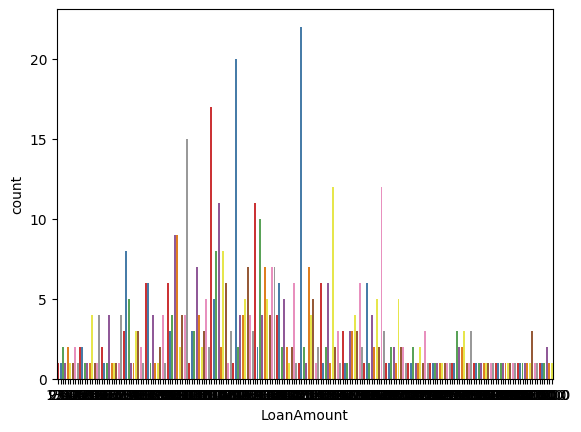

In [15]:
print("Number of people who take loan as group by Loanamount:")
print(df["LoanAmount"].value_counts())
sns.countplot(x = "LoanAmount",data = df,palette = "Set1")

Number of people who take loan as group by Credit history:
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

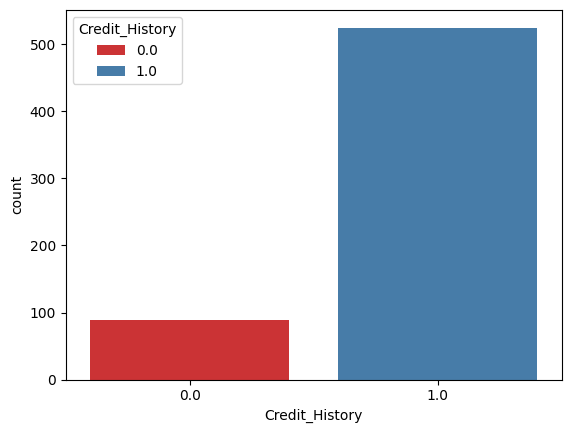

In [16]:
print("Number of people who take loan as group by Credit history:")
print(df["Credit_History"].value_counts())
sns.countplot(x = "Credit_History",data = df, hue = "Credit_History",palette = "Set1")


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import LabelEncoder
Labelencoder_X = LabelEncoder()

In [18]:
for i in range(0,5):
    X_train[:,i] = Labelencoder_X.fit_transform(X_train[:,i])
    X_train[:,7] = Labelencoder_X.fit_transform(X_train[:,7])
  
X_train


array([[1, 1, 3, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 3, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 0, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 3, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 3, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [19]:
Labelencoder_y = LabelEncoder()
y_train = Labelencoder_y.fit_transform(y_train)
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [20]:
for i in range(0,5):
    X_test[:,i] = Labelencoder_X.fit_transform(X_test[:,i])
    X_test[:,7] = Labelencoder_X.fit_transform(X_test[:,7])
  
X_test


array([[1, 0, 3, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 3, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 3, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 3, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 3, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 0, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 3, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 3, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 3, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 3, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 3, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 3, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 3, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 3, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [21]:
Labelencoder_y = LabelEncoder()
y_test = Labelencoder_y.fit_transform(y_test)
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [22]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)


# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy of Logistic Regression is:", accuracy_score(y_test, y_pred))
print("Confusion matrix of Logistic Regression is:\n", confusion_matrix(y_test, y_pred))
print("Classification report of Logistic regression is:\n", classification_report(y_test, y_pred))

# print(pd.DataFrame(data = y_test,y_pred,columns = ["y_test","y_pred"]))


Accuracy of Logistic Regression is: 0.8292682926829268
Confusion matrix of Logistic Regression is:
 [[14 19]
 [ 2 88]]
Classification report of Logistic regression is:
               precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



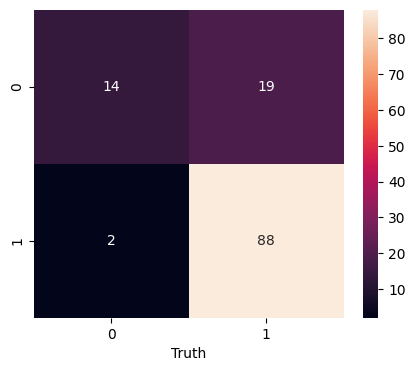

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.xlabel("Truth")
plt.show()

# Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy of Random forest classifier is:", accuracy_score(y_test, y_pred))
print("Confusion matrix of Random forest classifier is:\n", confusion_matrix(y_test, y_pred))
print("Classification report of Random forest classifier is:\n", classification_report(y_test, y_pred))

# print(pd.DataFrame(data = y_test,y_pred,columns = ["y_test","y_pred"]))


Accuracy of Random forest classifier is: 0.7967479674796748
Confusion matrix of Random forest classifier is:
 [[17 16]
 [ 9 81]]
Classification report of Random forest classifier is:
               precision    recall  f1-score   support

           0       0.65      0.52      0.58        33
           1       0.84      0.90      0.87        90

    accuracy                           0.80       123
   macro avg       0.74      0.71      0.72       123
weighted avg       0.79      0.80      0.79       123



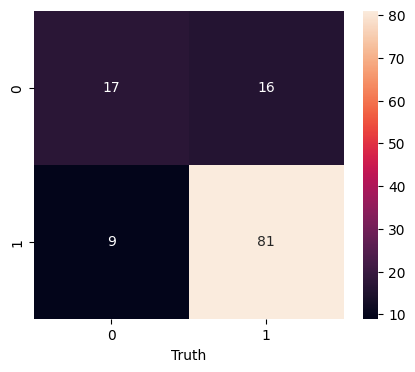

In [28]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.xlabel("Truth")
plt.show()

# Gaussian Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [30]:
print("Accuracy of Gaussian naive bayes is:", accuracy_score(y_test, y_pred))
print("Confusion matrix of Gaussian naive bayes is:\n", confusion_matrix(y_test, y_pred))
print("Classification report of Gaussian naive bayes is:\n", classification_report(y_test, y_pred))


Accuracy of Gaussian naive bayes is: 0.8292682926829268
Confusion matrix of Gaussian naive bayes is:
 [[14 19]
 [ 2 88]]
Classification report of Gaussian naive bayes is:
               precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



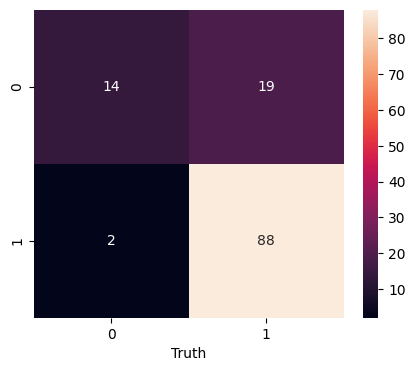

In [31]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.xlabel("Truth")
plt.show()

# Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [33]:
print("Accuracy of Decision Tree Classifier is:", accuracy_score(y_test, y_pred))
print("Confusion matrix of Decision Tree Classifier is:\n", confusion_matrix(y_test, y_pred))
print("Classification report of Decision Tree Classifier is:\n", classification_report(y_test, y_pred))


Accuracy of Decision Tree Classifier is: 0.7073170731707317
Confusion matrix of Decision Tree Classifier is:
 [[20 13]
 [23 67]]
Classification report of Decision Tree Classifier is:
               precision    recall  f1-score   support

           0       0.47      0.61      0.53        33
           1       0.84      0.74      0.79        90

    accuracy                           0.71       123
   macro avg       0.65      0.68      0.66       123
weighted avg       0.74      0.71      0.72       123



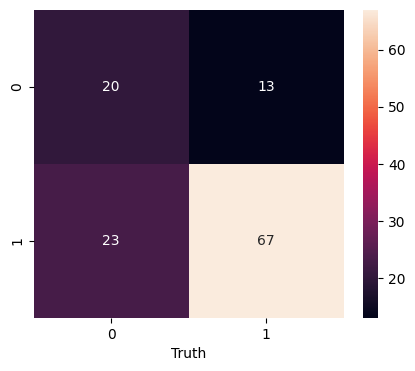

In [34]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.xlabel("Truth")
plt.show()

# K-Neighbor Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)

In [36]:
print("Accuracy of KNeighbor classifier is:", accuracy_score(y_test, y_pred))
print("Confusion matrix of KNeighbor classifier is:\n", confusion_matrix(y_test, y_pred))
print("Classification report of KNeighbor classifier is:\n", classification_report(y_test, y_pred))


Accuracy of KNeighbor classifier is: 0.7967479674796748
Confusion matrix of KNeighbor classifier is:
 [[15 18]
 [ 7 83]]
Classification report of KNeighbor classifier is:
               precision    recall  f1-score   support

           0       0.68      0.45      0.55        33
           1       0.82      0.92      0.87        90

    accuracy                           0.80       123
   macro avg       0.75      0.69      0.71       123
weighted avg       0.78      0.80      0.78       123



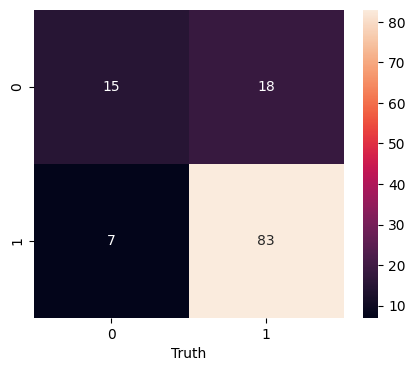

In [37]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.xlabel("Truth")
plt.show()